In [75]:
#libraries
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
from scipy.stats import skew

In [5]:
#import Min Max Temperature (already formatted in Excel)

MinMax = pd.read_csv('Min Max Temp.csv')
MinMax

,Product code,Bureau of Meteorology station number,Year,Month,Day,Day of the Year,Day of the Week,Minimum temperature (Degree C),Maximum temperature (Degree C)
0,IDCJAC0010,86338,2015,1,1,1,Thursday,13.3,26.9
1,IDCJAC0010,86338,2015,1,2,2,Friday,15.4,38.8
2,IDCJAC0010,86338,2015,1,3,3,Saturday,20.0,38.2
3,IDCJAC0010,86338,2015,1,4,4,Sunday,16.3,21.4
4,IDCJAC0010,86338,2015,1,5,5,Monday,15.0,22.0
...,...,...,...,...,...,...,...,...,...
2284,IDCJAC0010,86338,2021,4,3,93,Saturday,15.1,31.6
2285,IDCJAC0010,86338,2021,4,4,94,Sunday,15.2,24.5
2286,IDCJAC0010,86338,2021,4,5,95,Monday,16.0,19.0
2287,IDCJAC0010,86338,2021,4,6,96,Tuesday,12.8,20.2


In [6]:
MinMax.shape

(2289, 9)

In [7]:
MinMax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Product code                          2289 non-null   object 
 1   Bureau of Meteorology station number  2289 non-null   int64  
 2   Year                                  2289 non-null   int64  
 3   Month                                 2289 non-null   int64  
 4   Day                                   2289 non-null   int64  
 5   Day of the Year                       2289 non-null   int64  
 6   Day of the Week                       2289 non-null   object 
 7   Minimum temperature (Degree C)        2289 non-null   float64
 8   Maximum temperature (Degree C)        2289 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 161.1+ KB


In [8]:
#Check for missing values

MinMax.isnull().sum()

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Day                                     0
Day of the Year                         0
Day of the Week                         0
Minimum temperature (Degree C)          0
Maximum temperature (Degree C)          0
dtype: int64

In [9]:
#Delete columns that are irrelevant for prediction

MinMax = MinMax.drop(columns = ["Product code", "Bureau of Meteorology station number"])
MinMax.shape

(2289, 7)

In [10]:
#Rename min and max columns for easier coding

MinMax = MinMax.rename(columns = {'Minimum temperature (Degree C)': 'Min'})
MinMax = MinMax.rename(columns = {'Maximum temperature (Degree C)': 'Max'})
MinMax


,Year,Month,Day,Day of the Year,Day of the Week,Min,Max
0,2015,1,1,1,Thursday,13.3,26.9
1,2015,1,2,2,Friday,15.4,38.8
2,2015,1,3,3,Saturday,20.0,38.2
3,2015,1,4,4,Sunday,16.3,21.4
4,2015,1,5,5,Monday,15.0,22.0
...,...,...,...,...,...,...,...
2284,2021,4,3,93,Saturday,15.1,31.6
2285,2021,4,4,94,Sunday,15.2,24.5
2286,2021,4,5,95,Monday,16.0,19.0
2287,2021,4,6,96,Tuesday,12.8,20.2


In [11]:
#Test for predictive values of columns
from scipy import stats
a = MinMax['Day']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value (Min) is: -0.009218111769541591
r value (Max) is: -0.010700769733552119


In [12]:
#Test for predictive values of columns
a = MinMax['Day of the Year']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value (Min) is: -0.28855363275401014
r value (Max) is: -0.19512225024695978


In [13]:
#Test for predictive values of columns
a = MinMax['Year']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value (Min) is: 0.031119063230355272
r value (Max) is: 0.034747609209749716


In [14]:
a = MinMax['Month']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value (Min) is: -0.2910706019009437
r value (Max) is: -0.19692108832941452


#### Day of the Month < r = |0.01| and Year < r = |0.04| consider removing for better prediction. 

In [15]:
MinMax['Day'] = MinMax['Day'].astype(str)
MinMax.dtypes

Year                 int64
Month                int64
Day                 object
Day of the Year      int64
Day of the Week     object
Min                float64
Max                float64
dtype: object

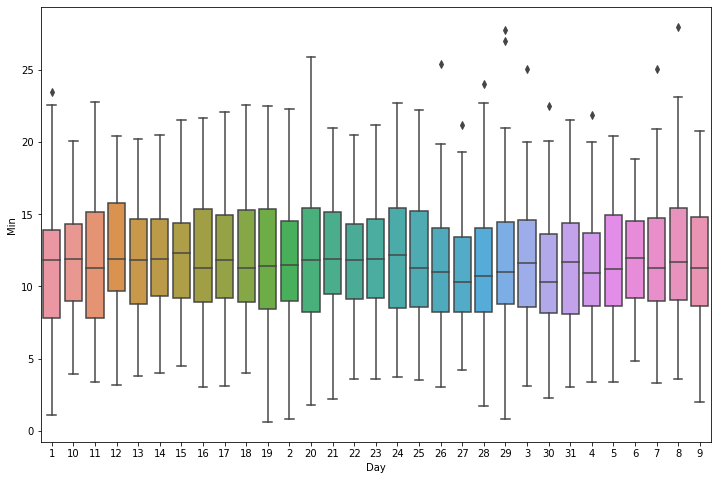

In [16]:
#Box plots of Day of Month for Minimum temperature
from matplotlib import figure

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day', y= 'Min',data = MinMax)
plt.show()


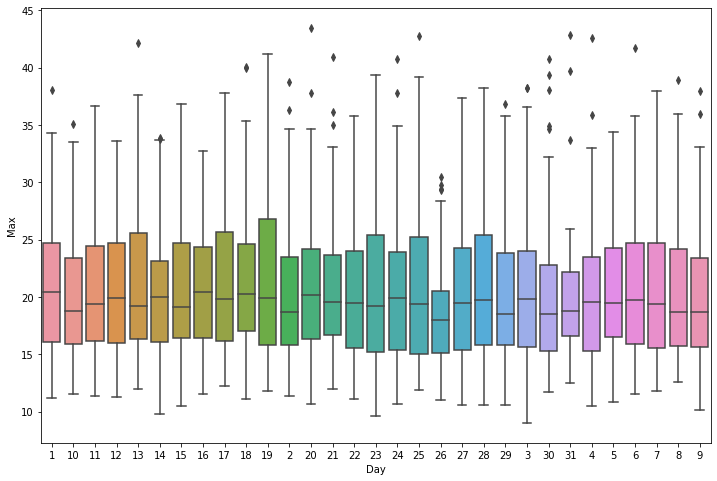

In [17]:
#Box plots of Day of Month for Maximum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day', y= 'Max',data = MinMax)
plt.show()

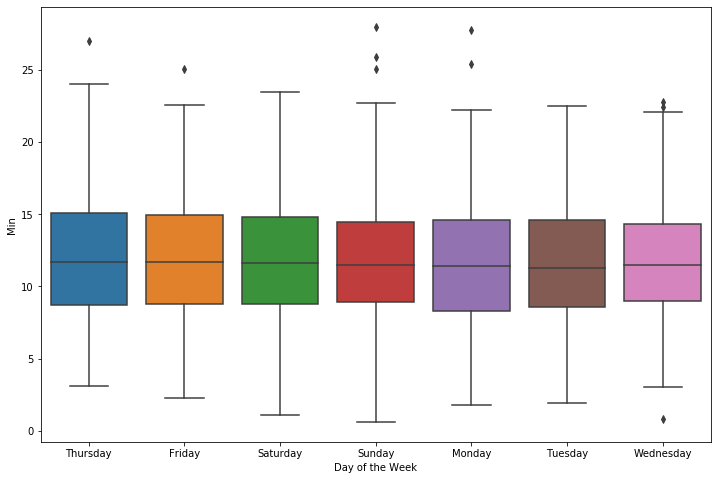

In [18]:
#Box plots of Day of the Week for Minimum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day of the Week', y= 'Min',data = MinMax)
plt.show()

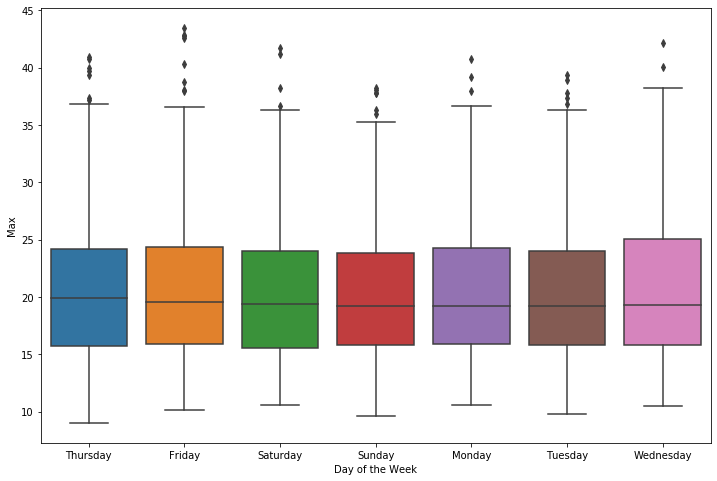

In [19]:
#Box plots of Day of the Week for Maximum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day of the Week', y= 'Max',data = MinMax)
plt.show()

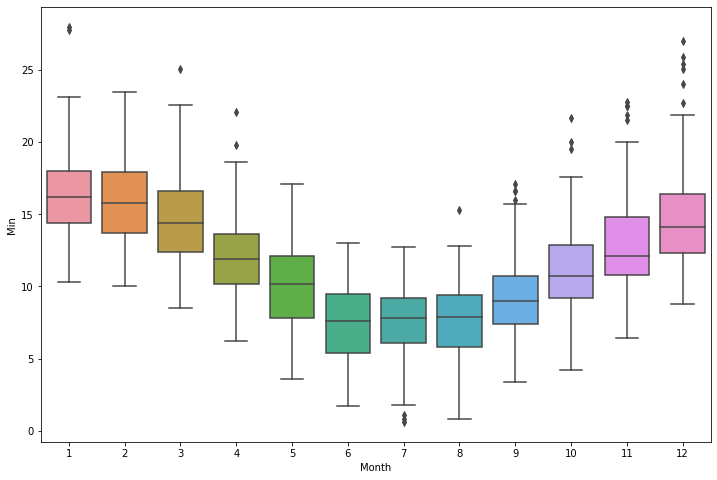

In [20]:
#Box plots of Month for Minumum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Month', y= 'Min',data = MinMax)
plt.show()


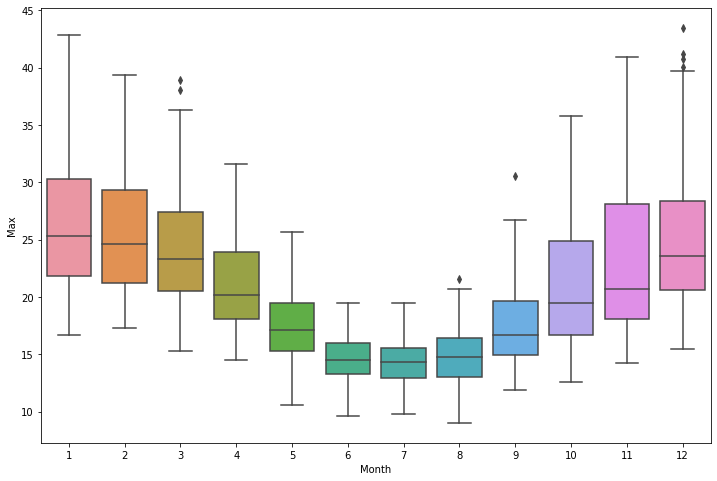

In [21]:
#Box plots of Month for Maximum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Month', y= 'Max',data = MinMax)
plt.show()

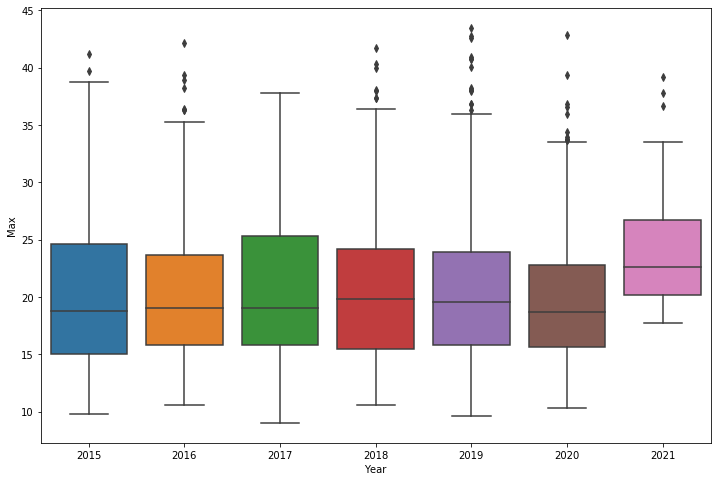

In [22]:
#Box plots of Year for Max temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Year', y= 'Max',data = MinMax)

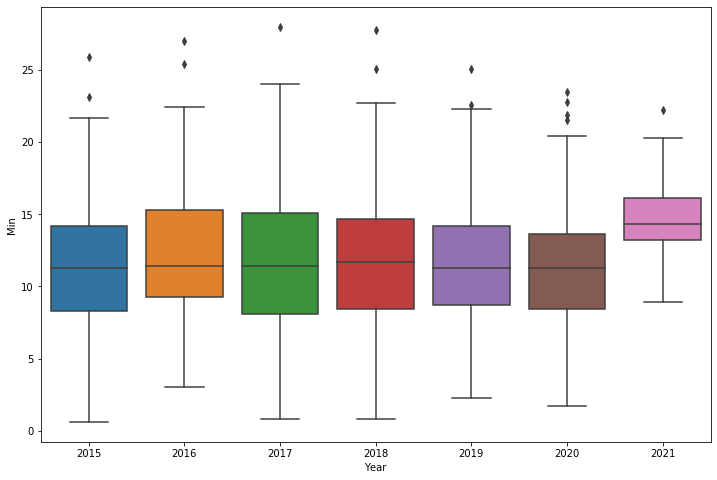

In [23]:
#Box plots of Year for Minumum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x = 'Year', y = 'Min', data = MinMax)
plt.show()

#### Day of the Week, Day of the Month do not show any identifiable differences consider removing before predicting.  Month does have a clear trend. Year has more variation in the extreames. 

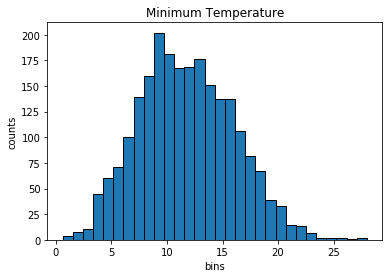

<Figure size 432x288 with 0 Axes>

In [24]:
#Histogram of Minimum Temperature

plt.hist(MinMax['Min'], edgecolor = 'black', bins=30)
plt.title('Minimum Temperature')
plt.xlabel('bins')
plt.ylabel('counts')
plt.show()
plt.clf()




In [80]:
#Summary Statistics

print(MinMax['Min'].describe())
print('skew:', MinMax['Min'].skew())

count    2289.000000
mean       11.753997
std         4.257914
min         0.600000
25%         8.700000
50%        11.500000
75%        14.700000
max        28.000000
Name: Min, dtype: float64
skew: 0.24535447832318097


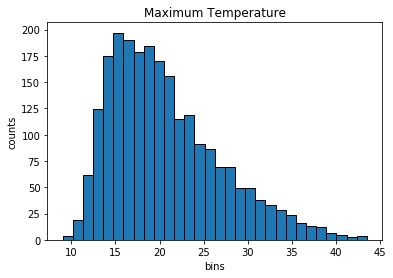

<Figure size 432x288 with 0 Axes>

In [26]:
#Histogram of Maximum Temperature

plt.hist(MinMax['Max'], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature')
plt.xlabel('bins')
plt.ylabel('counts')
plt.show()
plt.clf()

In [81]:
#Summary Statistics

print(MinMax['Max'].describe())
print('skew:', MinMax['Max'].skew())

count    2289.000000
mean       20.632591
std         6.251114
min         9.000000
25%        15.800000
50%        19.400000
75%        24.300000
max        43.500000
Name: Max, dtype: float64
skew: 0.8671657266097922


### From the two histograms we can see that the Minimum temperatures have a bell shape but Max temperature is positively skewed

#### Maximum temperature needs further investigation.  So sepearte by year and see what is going on.

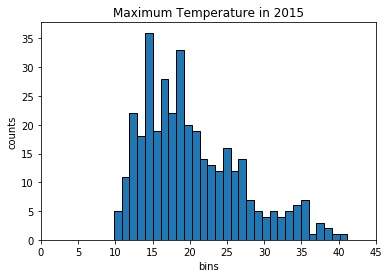

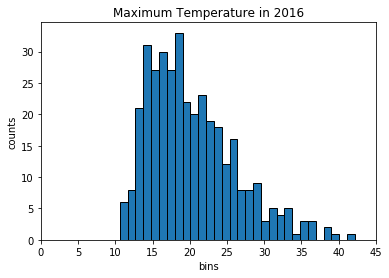

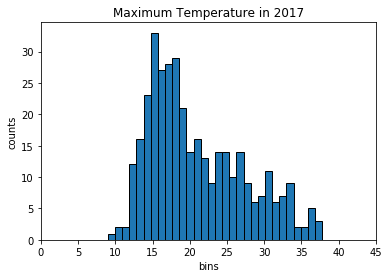

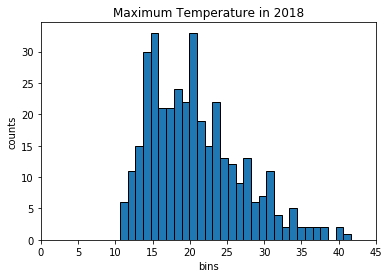

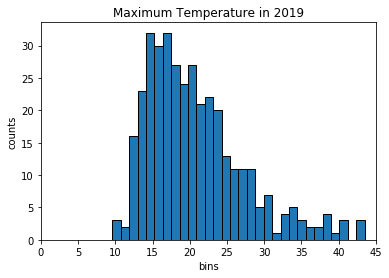

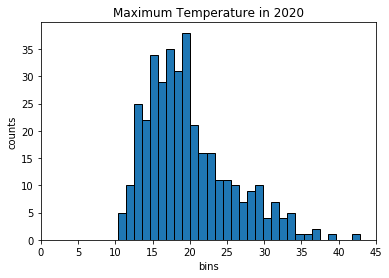

In [61]:
#Histogram by Year (Max 2015)

plt.hist(MinMax['Max'].iloc[0:365], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature in 2015')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()
plt.clf()

#Max 2016

plt.hist(MinMax['Max'].iloc[365:731], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature in 2016')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()
plt.clf()

#Max2017

plt.hist(MinMax['Max'].iloc[731:1096], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature in 2017')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()

#Max 2018

plt.hist(MinMax['Max'].iloc[1096:1461], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature in 2018')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()
plt.clf()

#Max 2019

plt.hist(MinMax['Max'].iloc[1461:1826], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature in 2019')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()


#Max 2020
plt.hist(MinMax['Max'].iloc[1826:2192], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature in 2020')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()

#### When aggregated the max temperature follows quite a smooth positively skewed graph.  Yearly it is difficult to see trends.  At first it may seem that if a year has extreame values then it will have a shallower mode and vice versa.  This may give some insight into predicting this years weather data as there may be some extreame temperatures this year.  Further investigation needed.  Histogram summary statistics needed.

In [73]:
#2015


print(MinMax['Max'].iloc[0:365].describe())

print('skew:', MinMax['Max'].iloc[0:365].skew())

count    365.000000
mean      20.359178
std        6.649688
min        9.800000
25%       15.000000
50%       18.800000
75%       24.600000
max       41.200000
Name: Max, dtype: float64
skew: 0.8438026497073926


In [74]:
#2016

print(MinMax['Max'].iloc[365:731].describe())
print('skew:', MinMax['Max'].iloc[365:731].skew())

count    366.000000
mean      20.325410
std        5.895425
min       10.600000
25%       15.800000
50%       19.050000
75%       23.675000
max       42.200000
Name: Max, dtype: float64
skew: 0.9428768963686318


In [82]:
#2017

print(MinMax['Max'].iloc[731:1096].describe())
print('skew:', MinMax['Max'].iloc[365:731].skew())

count    365.000000
mean      20.875616
std        6.434931
min        9.000000
25%       15.800000
50%       19.000000
75%       25.300000
max       37.800000
Name: Max, dtype: float64
skew: 0.9428768963686318


In [84]:
#2018

print(MinMax['Max'].iloc[1096:1461].describe())
print('skew:', MinMax['Max'].iloc[1096:1461].skew())

count    365.000000
mean      20.722192
std        6.164260
min       10.600000
25%       15.500000
50%       19.800000
75%       24.200000
max       41.700000
Name: Max, dtype: float64
skew: 0.8225639805853807


In [85]:
#2019

print(MinMax['Max'].iloc[1461:1826].describe())
print('skew:', MinMax['Max'].iloc[1461:1826].skew())

count    365.000000
mean      20.756164
std        6.558104
min        9.600000
25%       15.800000
50%       19.600000
75%       23.900000
max       43.500000
Name: Max, dtype: float64
skew: 1.1043210523172733


In [86]:
#2020

print(MinMax['Max'].iloc[1826:2192].describe())
print('skew:', MinMax['Max'].iloc[1826:2192].skew())

count    366.000000
mean      19.856557
std        5.810614
min       10.300000
25%       15.625000
50%       18.650000
75%       22.800000
max       42.900000
Name: Max, dtype: float64
skew: 0.9758570474392516


#### Depending on the max values of 2021 it may be possible to detect the overal shape of 2021's histogram.  Is it more like 2019 with a lot of skew or perhaps like 2018.  Let's test to find out.

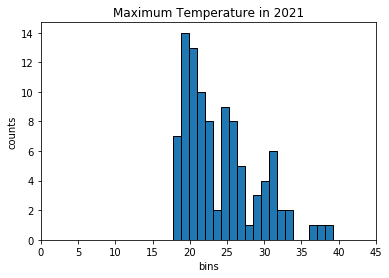

count    97.000000
mean     24.031959
std       4.904856
min      17.700000
25%      20.200000
50%      22.600000
75%      26.700000
max      39.200000
Name: Max, dtype: float64
skew: 0.9758570474392516


In [91]:
#Max 2021
plt.hist(MinMax['Max'].iloc[2192:], edgecolor = 'black', bins=20)
plt.title('Maximum Temperature in 2021')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()

#Max 2020
print(MinMax['Max'].iloc[2192:].describe())
print('skew:', MinMax['Max'].iloc[1826:2192:].skew())

#### Still not enough information.  Look at histograms of the first 96 days of each year and see which one most closely resembles the first 96 days of 2021.  Then get a similarity score and see if the machine learning algorithm can beat the accuracy of the year chosen. If not then use the year chosen as the prediction.

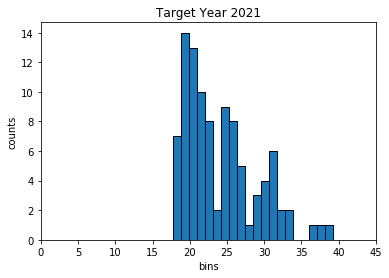

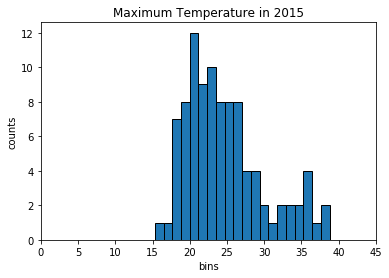

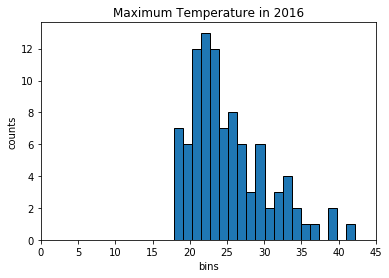

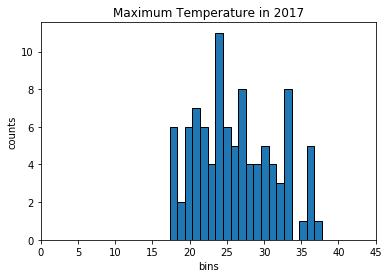

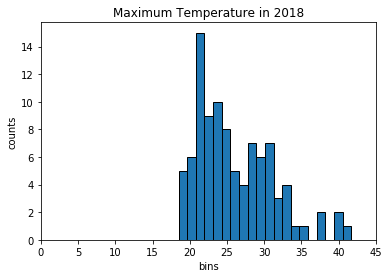

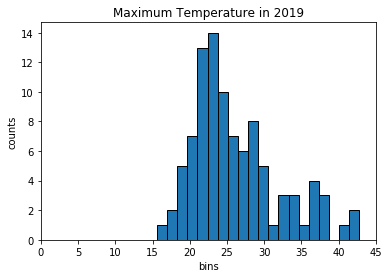

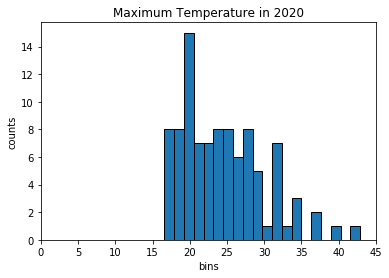

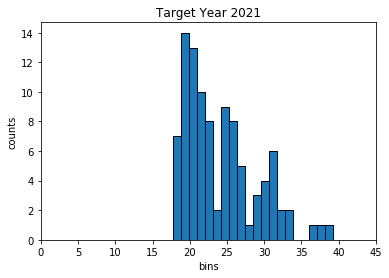

In [93]:
#First 96 days of each year.

#Target Year 2021

plt.hist(MinMax['Max'].iloc[2192:], edgecolor = 'black', bins=20)
plt.title('Target Year 2021')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()

#Max 2015

plt.hist(MinMax['Max'].iloc[0:96], edgecolor = 'black', bins=20)
plt.title('Maximum Temperature in 2015')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()
plt.clf()

#Max 2016

plt.hist(MinMax['Max'].iloc[365:461], edgecolor = 'black', bins=20)
plt.title('Maximum Temperature in 2016')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()
plt.clf()

#Max2017

plt.hist(MinMax['Max'].iloc[731:827], edgecolor = 'black', bins=20)
plt.title('Maximum Temperature in 2017')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()

#Max 2018

plt.hist(MinMax['Max'].iloc[1096:1192], edgecolor = 'black', bins=20)
plt.title('Maximum Temperature in 2018')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()
plt.clf()

#Max 2019

plt.hist(MinMax['Max'].iloc[1461:1557], edgecolor = 'black', bins=20)
plt.title('Maximum Temperature in 2019')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()


#Max 2020
plt.hist(MinMax['Max'].iloc[1826:1922], edgecolor = 'black', bins=20)
plt.title('Maximum Temperature in 2020')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()


#Target Year 2021

plt.hist(MinMax['Max'].iloc[2192:], edgecolor = 'black', bins=20)
plt.title('Target Year 2021')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()

#### Looks similar to 2016 or 2018.  Let's find the simliarity score of each year's first 96 days and then compare with 2021. And this can be our benchmark for the ML algorithms.

In [99]:
#KS 2 sample test for Max values

#2015

print('x=2015, y=2021', stats.ks_2samp(MinMax['Max'].iloc[0:96], MinMax['Max'].iloc[2192:]))

#2016
print('x=2016, y=2021', stats.ks_2samp(MinMax['Max'].iloc[365:461], MinMax['Max'].iloc[2192:]))

#2017
print('x=2017, y=2021', stats.ks_2samp(MinMax['Max'].iloc[731:827], MinMax['Max'].iloc[2192:]))

#2018
print('x=2018, y=2021', stats.ks_2samp(MinMax['Max'].iloc[1096:1192], MinMax['Max'].iloc[2192:]))

#2019
print('x=2019, y=2021', stats.ks_2samp(MinMax['Max'].iloc[1461:1557], MinMax['Max'].iloc[2192:]))

#2020
print('x=2030, y=2021', stats.ks_2samp(MinMax['Max'].iloc[1826:1922], MinMax['Max'].iloc[2192:]))

x=2015, y=2021 Ks_2sampResult(statistic=0.1092139175257732, pvalue=0.5575608068386082)
x=2016, y=2021 Ks_2sampResult(statistic=0.18395618556701032, pvalue=0.05932586904347725)
x=2017, y=2021 Ks_2sampResult(statistic=0.234106529209622, pvalue=0.007463106478503567)
x=2018, y=2021 Ks_2sampResult(statistic=0.23636168384879724, pvalue=0.0063942749847359925)
x=2019, y=2021 Ks_2sampResult(statistic=0.234643470790378, pvalue=0.0070238341233427315)
x=2030, y=2021 Ks_2sampResult(statistic=0.09901202749140893, pvalue=0.6759793062920387)


#### It seems as if 2018 has the highest KS statistic with 0.236.  An ordered KS test might give further insight into the data and also eliminate day to day variation

In [106]:
stats.ks_2samp(MinMax['Max'][0:96].sort_values(), MinMax['Max'][2192:].sort_values())

Ks_2sampResult(statistic=0.1092139175257732, pvalue=0.5575608068386082)

In [107]:
stats.ks_2samp(MinMax['Max'][365:461].sort_values(), MinMax['Max'][2192:].sort_values())

Ks_2sampResult(statistic=0.18395618556701032, pvalue=0.05932586904347725)

#### KS test doesn't order???  Methodology may be wrong (ie. wrong test).  Help needed